
Feature (X) Count: (886, 8)
Target (y) Count: (886,)


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.805263,0.783333,0.661972,0.717557
1,Naïve Bayes,0.715789,0.591398,0.774648,0.670732
2,Random Forest Classifier,0.794737,0.705128,0.774648,0.738255


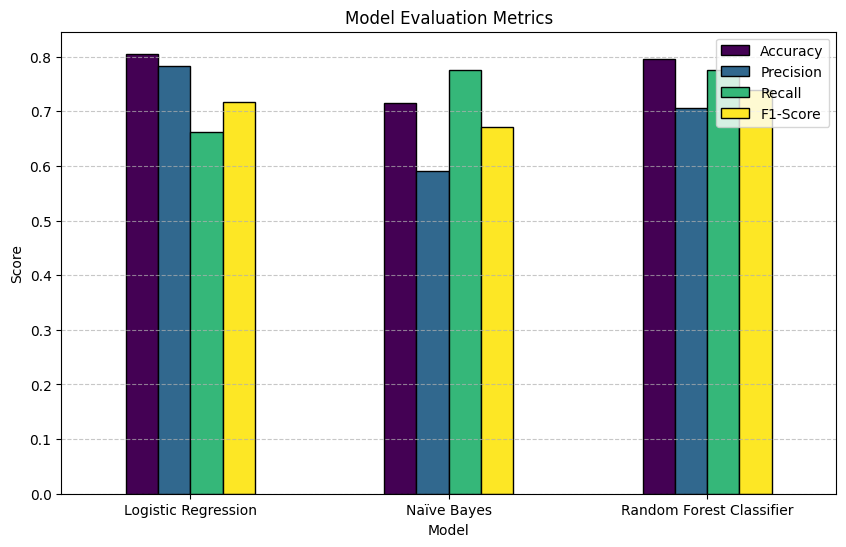

,Predicted Survival
700,1.0
701,1.0
702,0.0
703,1.0
704,0.0
...,...
885,0.0
886,1.0
887,1.0
888,1.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display

# Load dataset
data_path = 'titanic_dataset.csv'
df = pd.read_csv(data_path)

#......Pre-processing.......

# Drop irrelevant columns
df.drop(columns=['Name', 'Ticket No.'], inplace=True)

# Drop rows where the target variable 'Survival' is missing
df.dropna(subset=['Survival'], inplace=True)

# Handling missing values
num_imputer = SimpleImputer(strategy='mean')  # Impute numerical features with mean
cat_imputer = SimpleImputer(strategy='most_frequent')  # Impute categorical features with mode

# One-hot encoding and scaling
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Age', 'Fare', 'Parch', 'SibSp']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', num_imputer), ('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline(steps=[('imputer', cat_imputer), ('encoder', OneHotEncoder(drop='first'))]), categorical_features)
    ]
)

# Define features and target variable
X = df.drop(columns=['Survival'])
y = df['Survival']

# Display count of X (features) and y (target)
print("\nFeature (X) Count:", X.shape)
print("Target (y) Count:", y.shape)

# Train-test split (last 190 rows for test set)
X_train, X_test, y_train, y_test = X.iloc[:-190], X.iloc[-190:], y.iloc[:-190], y.iloc[-190:]

#.........training the models........

# Define models
logistic_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42))])
nb_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GaussianNB())])
rf_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])

# Train models
logistic_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

# Storing results
results = [
    evaluate_model(y_test, y_pred_logistic, 'Logistic Regression'),
    evaluate_model(y_test, y_pred_nb, 'Naïve Bayes'),
    evaluate_model(y_test, y_pred_rf, 'Random Forest Classifier')
]

# Creating a DataFrame
df_results = pd.DataFrame(results)

# Displaying the table
display(df_results)

# Plot evaluation metrics
df_results.set_index('Model', inplace=True)  # Set model names as index for plotting
df_results.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')

plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)  # Keep model names readable
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Predict passenger survival using the best model (Random Forest)
df_test_predictions = X_test.copy()
df_test_predictions['Predicted Survival'] = y_pred_rf

# Display predicted survival results
display(df_test_predictions[['Predicted Survival']])
